# Titanic - Machine Learning from Disaster

In [1]:
# manipulation
import pandas as pd
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Open train and test data

In [2]:
train_data = pd.read_csv("Data/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("Data/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Explore data

In [4]:
# information about train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# information about test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


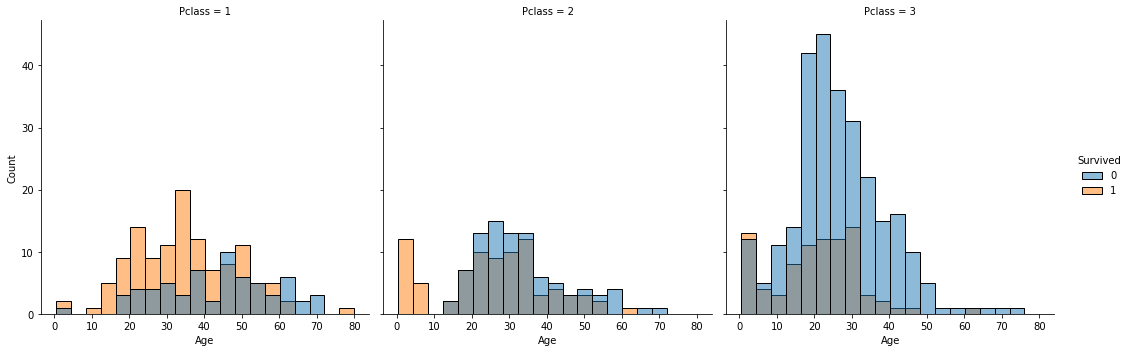

In [22]:
sns.displot(data=train_data, x="Age", hue="Survived", col="Pclass")

In [7]:
# rate of survived by sex 
count_grouped   = train_data.groupby(["Sex"])["Survived"].count()
sum_grouped     = train_data.groupby(["Sex"])["Survived"].sum()

over_sex = (sum_grouped*100/count_grouped).values
over_all = (sum_grouped*100/len(train_data)).values
all_sex  = train_data["Survived"].sum()*100/len(train_data)
print(f"{over_sex[0]:.2f}% -> Survived-ratio women over all women")
print(f"{over_all[0]:.2f}% -> Survived-ratio women over all")
print(f"{over_sex[1]:.2f}% -> Survived-ratio men over all men")
print(f"{over_all[1]:.2f}% -> Survived-ratio men over all")
print(f"{all_sex:.2f}% -> Survived-ratio all")

74.20% -> Survived-ratio women over all women
26.15% -> Survived-ratio women over all
18.89% -> Survived-ratio men over all men
12.23% -> Survived-ratio men over all
38.38% -> Survived-ratio all


## 3. Machine learning model

In [26]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

X

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1
...,...,...,...,...,...
886,2,0,0,0,1
887,1,0,0,1,0
888,3,1,2,1,0
889,1,0,0,0,1


In [27]:
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
set_config(display='diagram')

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model

RandomForestClassifier(max_depth=5, random_state=1)

In [28]:
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('Output/titanic/my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
